<h1> Starting with the requirements </h1>


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import tree

<h2>Import the dataset </h2>
After importing the dataset, check the shapes of those datasets to get the size. Also, use describe to find the important details about the data. 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Shape of training dataset:- %s'%str(train.shape))
print('Shape of testing dataset:- %s'%str(test.shape))


Shape of training dataset:- (891, 12)
Shape of testing dataset:- (418, 11)


In [3]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<b>Clearly shows that there are some missing values in age, cabin and embarked columns.</b>

<h2> Perform basic analysis on data </h2>
Such as difference between survived and deceased, survival by sex etc.

In [6]:
print(train['Survived'].value_counts())
print('-'*30)
print(train['Survived'].value_counts(normalize=True))

0    549
1    342
Name: Survived, dtype: int64
------------------------------
0    0.616162
1    0.383838
Name: Survived, dtype: float64


0    468
1    109
Name: Survived, dtype: int64
------------------------------
0    0.811092
1    0.188908
Name: Survived, dtype: float64


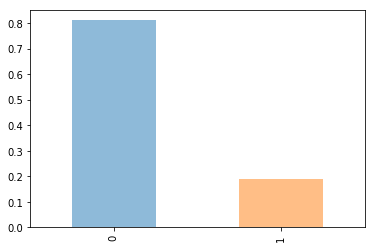

In [7]:
print(train['Survived'][train['Sex']=='male'].value_counts())
print('-'*30)
print(train['Survived'][train['Sex']=='male'].value_counts(normalize=True))
train['Survived'][train['Sex']=='male'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

1    233
0     81
Name: Survived, dtype: int64
------------------------------
1    0.742038
0    0.257962
Name: Survived, dtype: float64


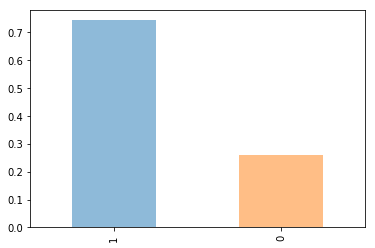

In [8]:
print(train['Survived'][train['Sex']=='female'].value_counts())
print('-'*30)
print(train['Survived'][train['Sex']=='female'].value_counts(normalize=True))
train['Survived'][train['Sex']=='female'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

<b>Mind the fact that the value got swapped in both results. '1' stands for Survival and '0' stands for deceased.<b>

Let's identify childrens. Column 'Child' contains 1 for less than 18 else 0.

In [9]:
pd.options.mode.chained_assignment = None
# Create the column Child and assign to 'NaN'
train["Child"] = float('NaN')

# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column.
train['Child'][train['Age']<18] = 1
train['Child'][train['Age']>=18] = 0

# Print normalized Survival Rates for passengers under 18
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))

# Print normalized Survival Rates for passengers 18 or older
print(train["Survived"][train["Child"] == 0].value_counts(normalize = True))

1    0.539823
0    0.460177
Name: Survived, dtype: float64
0    0.618968
1    0.381032
Name: Survived, dtype: float64


<h2>First Prediction </h2>
We have already seen that females had a better chance of survival so let's make females as survived and males as deceased.

In [10]:
# Create a copy of test: test_one
test_one = test.copy()

# Initialize a Survived column to 0
test_one['Survived'] = 0

# Set Survived to 1 if Sex equals "female" and print the `Survived` column from `test_one`
test_one['Survived'][test_one['Sex']=='female'] = 1
# test_one['Survived'][test_one['Sex']=='male'] = 0
print(test_one['Survived'].head())

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


<h2>Predicting with Decision Trees</h2>
Let's start with the cleaning and formatting the data.

<b> Since 'Sex' and 'Embarked' contains categorical values, we need to assign interger to each specific values.</b> <br>

In 'Sex' Column : 1 for female & 0 for male <br>

In 'Embarked' Column : 0 for 'S', 1 for 'C' & 2 for 'Q'
<br>
Also, we are going to impute the missing Embarked values with the Class S.

In [11]:
#Replace Age as NaN with median
train["Age"] = train["Age"].fillna(train["Age"].median())
# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
# Impute the Embarked variable
train["Embarked"] = train['Embarked'].fillna('S')

# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

#Print the Sex and Embarked columns
print(train[['Sex','Embarked']].head())

  Sex Embarked
0   0        0
1   1        1
2   1        0
3   1        0
4   0        0


<b> Creating the Decision Tree </b>

In [12]:
# Print the train data to see the available features
print(train.head())

# Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)
print('-'*60)
# Look at the importance and score of the included features
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Child  
0         A/5 21171   7.2500   NaN        0    0.0  
1          PC 17599  71.2833   C85        1    0.0  
2  STON/O2. 3101282   7.9250   NaN        0    0.0  
3            113803  53.1000  C123        0    0.0  
4            373450   8.0500   NaN   

<i> It signifies that <b>Fare</b> played a major role in the survival.

<b> Predict with Decision Trees </b>

In [15]:
# Impute the missing value with the median
test.Fare[152] = test['Fare'].median()

#Replace Age as NaN with median
test["Age"] = test["Age"].fillna(test["Age"].median())

# Convert the male and female groups to integer form
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

# Convert the Embarked classes to integer form
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[['Pclass', 'Sex', 'Age', 'Fare']].values

# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution.head())

# Check that your data frame has 418 entries
print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         1
895         1
896         1
(418, 1)


In [16]:
# Create a new array with the added features: features_two
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two,target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two,target))

0.9057239057239057


In [17]:
# Create a new array with the added features: features_two
test_features_two = test[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

# Make your prediction using the test set
my_prediction = my_tree_two.predict(test_features_two)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution_two = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution_two.head())

# Check that your data frame has 418 entries
print(my_solution_two.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution_two.to_csv("my_solution_two.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         0
895         0
896         1
(418, 1)


<h2> Feature Engineering </h2>
Let's create a column for family-size which contains sum of 'SibSp','Parch' and adding 1(Individual) to them. 

In [19]:
# Create train_two with the newly defined feature
train_two = train.copy()
train_two["family_size"] = train_two['SibSp'] + train_two['Parch'] + 1

# Create a new feature set and add the new feature
features_three = train_two[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

# Define the tree classifier, then fit the model
my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three,target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))


0.9797979797979798


<h2>Improving predictions using Random Forest</h2>

In [21]:

# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

# Print the score of the fitted random forest
print(my_forest.score(features_forest, target))

# Compute predictions on our test set features then print the length of the prediction vector
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
print(len(pred_forest))


0.9393939393939394
418


In [23]:
final_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])

# Write your solution to a csv file with the name my_solution.csv
final_solution.to_csv("final_solution.csv", index_label = ["PassengerId"])

<h2>Interprating and Comparing </h2>

In [24]:
#Request and print the `.feature_importances_` attribute
print(my_tree_two.feature_importances_)
print(my_forest.feature_importances_)

#Compute and print the mean accuracy score for both models
print(my_tree_two.score(features_two, target))
print(my_forest.score(features_forest,target))

[0.14130255 0.17906027 0.41616727 0.17938711 0.05039699 0.01923751
 0.0144483 ]
[0.10384741 0.20139027 0.31989322 0.24602858 0.05272693 0.04159232
 0.03452128]
0.9057239057239057
0.9393939393939394
